In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import spacy

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from wordcloud import WordCloud
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from collections import Counter
from sklearn.preprocessing import normalize

In [53]:
data = pd.read_csv('sample-data.csv')

# Data Preprocessing

In [59]:
data

id  \
0      1   
1      2   
2      3   
3      4   
4      5   
..   ...   
495  496   
496  497   
497  498   
498  499   
499  500   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        description  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry"</li> <li>"Exposed, brushed elastic waistband for comfort"</li> <li>5-panel construction with traditional boxer back</li> <li>"Inseam (size M) is 4 1/2"""</li></ul><br><br><b>Fabric: </b>3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>99 g (3.5 oz)<br><br>Made in Mexico.   
1                                      

In [49]:
nlp = spacy.load("en_core_web_sm")

In [55]:
terms_to_remove = r"\boz\b|\bg\b|\bS\b|\bL\b|\bM\b|\bXL\b|\bXS\b"

In [88]:
data['no_title_desc'] = data['description'].str.split('-', n=1).str[1].str.strip()
data['no_title_desc'] = data['no_title_desc'].str.replace(r"<[^>]*>", "", regex=True).str.strip()
data['no_title_desc'] = data['no_title_desc'].str.replace(terms_to_remove, "", regex=True).str.strip()
data['clean_desc'] = data['description'].str.replace(r"<[^>]*>", "", regex=True).str.strip()
data['clean_desc'] = data['clean_desc'].str.replace(terms_to_remove, "", regex=True).str.strip()
data

id                                        description  \
0      1  Active classic boxers - There's a reason why o...   
1      2  Active sport boxer briefs - Skinning up Glory ...   
2      3  Active sport briefs - These superbreathable no...   
3      4  Alpine guide pants - Skin in, climb ice, switc...   
4      5  Alpine wind jkt - On high ridges, steep ice an...   
..   ...                                                ...   
495  496  Cap 2 bottoms - Cut loose from the maddening c...   
496  497  Cap 2 crew - This crew takes the edge off fick...   
497  498  All-time shell - No need to use that morning T...   
498  499  All-wear cargo shorts - All-Wear Cargo Shorts ...   
499  500  All-wear shorts - Time to simplify? Our All-We...   

                                         no_title_desc  \
0    There's a reason why our boxers are a cult fav...   
1    Skinning up Glory requires enough movement wit...   
2    These superbreathable no-fly briefs are the mi...   
3    Skin in, climb ice, switch to rock, traverse a...   
4    On high ridges, steep ice and anything alpine,...   
..                                                 ...   
495  Cut loose from the maddening crowds and search...   
496  This crew takes the edge off fickle weather. I...   
497  time shell - No need to use that morning Times...   
498  wear cargo shorts - All-Wear Cargo Shorts bask...   
499  wear shorts - Time to simplify? Our All-Wear s...   

                                            clean_desc  \
0    Active classic boxers - There's a reason why o...   
1    Active sport boxer briefs - Skinning up Glory ...   
2    Active sport briefs - These superbreathable no...   
3    Alpine guide pants - Skin in, climb ice, switc...   
4    Alpine wind jkt - On high ridges, steep ice an...   
..                                                 ...   
495  Cap 2 bottoms - Cut loose from the maddening c...   
496  Cap 2 crew - This crew takes the edge off fick...   
497  All-time shell - No need to use that morning T...   
498  All-wear cargo shorts - All-Wear Cargo Shorts ...   
499  All-wear shorts - Time to simplify? Our All-We...   

                                       pro_description  \
0    active classic boxer reason boxer cult favorit...   
1    active sport boxer brief skin glory require mo...   
2    active sport brief superbreathable fly brief m...   
3    alpine guide pant skin climb ice switch rock t...   
4    alpine wind jkt high ridge steep ice alpine ja...   
..                                                 ...   
495  cap bottom cut loose madden crowd search undon...   
496  cap crew crew take edge fickle weather clearin...   
497  time shell need use morning time umbrella time...   
498  wear cargo short wear cargo short bask glory s...   
499  wear short time simplify wear short prove shor...   

                                     pro_no_title_desc  cluster main_topic  
0    reason boxer cult favorite cool especially sti...        0    topic_0  
1    skin glory require movement boxer decide poach...        0    topic_0  
2    superbreathable fly brief minimalist choice hi...        0    topic_0  
3    skin climb ice switch rock traverse knife edge...        1    topic_0  
4    high ridge steep ice alpine jacket serve true ...        1    topic_0  
..                                                 ...      ...        ...  
495  cut loose madden crowd search undone capilene ...        0    topic_2  
496  crew take edge fickle weather clearing conditi...        0    topic_2  
497  time shell need use morning time umbrella time...        1    topic_0  
498  wear cargo short wear cargo short bask glory s...        1    topic_3  
499  wear short time simplify wear short prove shor...        1    topic_0  

[500 rows x 8 columns]

In [68]:
def preprocess_text(text):
    doc = nlp(text.lower())
    
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return " ".join(tokens)

data['pro_description'] = data['clean_desc'].apply(preprocess_text)
data['pro_no_title_desc'] = data['no_title_desc'].apply(preprocess_text)

data

id                                        description  \
0      1  Active classic boxers - There's a reason why o...   
1      2  Active sport boxer briefs - Skinning up Glory ...   
2      3  Active sport briefs - These superbreathable no...   
3      4  Alpine guide pants - Skin in, climb ice, switc...   
4      5  Alpine wind jkt - On high ridges, steep ice an...   
..   ...                                                ...   
495  496  Cap 2 bottoms - Cut loose from the maddening c...   
496  497  Cap 2 crew - This crew takes the edge off fick...   
497  498  All-time shell - No need to use that morning T...   
498  499  All-wear cargo shorts - All-Wear Cargo Shorts ...   
499  500  All-wear shorts - Time to simplify? Our All-We...   

                                         no_title_desc  \
0    There's a reason why our boxers are a cult fav...   
1    Skinning up Glory requires enough movement wit...   
2    These superbreathable no-fly briefs are the mi...   
3    Skin in, climb ice, switch to rock, traverse a...   
4    On high ridges, steep ice and anything alpine,...   
..                                                 ...   
495  Cut loose from the maddening crowds and search...   
496  This crew takes the edge off fickle weather. I...   
497  time shell - No need to use that morning Times...   
498  wear cargo shorts - All-Wear Cargo Shorts bask...   
499  wear shorts - Time to simplify? Our All-Wear s...   

                                            clean_desc  \
0    Active classic boxers - There's a reason why o...   
1    Active sport boxer briefs - Skinning up Glory ...   
2    Active sport briefs - These superbreathable no...   
3    Alpine guide pants - Skin in, climb ice, switc...   
4    Alpine wind jkt - On high ridges, steep ice an...   
..                                                 ...   
495  Cap 2 bottoms - Cut loose from the maddening c...   
496  Cap 2 crew - This crew takes the edge off fick...   
497  All-time shell - No need to use that morning T...   
498  All-wear cargo shorts - All-Wear Cargo Shorts ...   
499  All-wear shorts - Time to simplify? Our All-We...   

                                       pro_description  \
0    active classic boxer reason boxer cult favorit...   
1    active sport boxer brief skin glory require mo...   
2    active sport brief superbreathable fly brief m...   
3    alpine guide pant skin climb ice switch rock t...   
4    alpine wind jkt high ridge steep ice alpine ja...   
..                                                 ...   
495  cap bottom cut loose madden crowd search undon...   
496  cap crew crew take edge fickle weather clearin...   
497  time shell need use morning time umbrella time...   
498  wear cargo short wear cargo short bask glory s...   
499  wear short time simplify wear short prove shor...   

                                     pro_no_title_desc  
0    reason boxer cult favorite cool especially sti...  
1    skin glory require movement boxer decide poach...  
2    superbreathable fly brief minimalist choice hi...  
3    skin climb ice switch rock traverse knife edge...  
4    high ridge steep ice alpine jacket serve true ...  
..                                                 ...  
495  cut loose madden crowd search undone capilene ...  
496  crew take edge fickle weather clearing conditi...  
497  time shell need use morning time umbrella time...  
498  wear cargo short wear cargo short bask glory s...  
499  wear short time simplify wear short prove shor...  

[500 rows x 6 columns]

In [ ]:
pd.set_option('display.max_colwidth', None)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data[['description','pro_description']])

pd.reset_option('display.max_colwidth')

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['pro_description'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# DBScan ML

In [ ]:
eps_values = np.linspace(0.5, 0.8, 301).round(3)
min_samples_values = range(2, 5)

tfidf_matrix_norm = normalize(tfidf_matrix, norm='l2')

results = []


for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="cosine")
        labels = dbscan.fit_predict(tfidf_matrix_norm)
        
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_outliers = list(labels).count(-1)
        
        
        cluster_counts = Counter([label for label in labels if label != -1])
        if cluster_counts:
            largest_cluster_size = max(cluster_counts.values())
            smallest_cluster_size = min(cluster_counts.values())
            mean_cluster_size = np.mean(list(cluster_counts.values()))
            std_cluster_size = np.std(list(cluster_counts.values()))
            largest_cluster_percentage = (largest_cluster_size / sum(cluster_counts.values())) * 100
        else:
            largest_cluster_size = smallest_cluster_size = mean_cluster_size = std_cluster_size = largest_cluster_percentage = 0

        
        results.append({
            "eps": eps, 
            "min_samples": min_samples, 
            "n_clusters": n_clusters, 
            "n_outliers": n_outliers, 
            "largest_cluster_size": largest_cluster_size,
            "smallest_cluster_size": smallest_cluster_size,
            "mean_cluster_size": mean_cluster_size,
            "std_cluster_size": std_cluster_size,
            "largest_cluster_percentage": largest_cluster_percentage
        })
results_df = pd.DataFrame(results)


In [71]:
results_df

eps  min_samples  n_clusters  n_outliers  largest_cluster_size  \
0    0.500            2          86         160                    44   
1    0.500            3          36         260                    44   
2    0.500            4          25         297                    44   
3    0.501            2          86         160                    44   
4    0.501            3          36         260                    44   
..     ...          ...         ...         ...                   ...   
898  0.799            3           4           3                   480   
899  0.799            4           4           5                   478   
900  0.800            2           4           3                   480   
901  0.800            3           4           3                   480   
902  0.800            4           4           5                   478   

     smallest_cluster_size  mean_cluster_size  std_cluster_size  \
0                        2           3.953488          5.555025   
1                        3           6.666667          7.813805   
2                        4           8.120000          8.945703   
3                        2           3.953488          5.555025   
4                        3           6.666667          7.813805   
..                     ...                ...               ...   
898                      4         124.250000        205.397633   
899                      4         123.750000        204.531630   
900                      4         124.250000        205.397633   
901                      4         124.250000        205.397633   
902                      4         123.750000        204.531630   

     largest_cluster_percentage  
0                     12.941176  
1                     18.333333  
2                     21.674877  
3                     12.941176  
4                     18.333333  
..                          ...  
898                   96.579477  
899                   96.565657  
900                   96.579477  
901                   96.579477  
902                   96.565657  

[903 rows x 9 columns]

In [72]:
filtered_results_df = results_df[(results_df['n_clusters'] >= 10)&(results_df['n_clusters'] <= 20)&(results_df['largest_cluster_percentage'] <= 60)]
filtered_results_df

eps  min_samples  n_clusters  n_outliers  largest_cluster_size  \
512  0.670            4          20          97                   167   
515  0.671            4          20          97                   167   
536  0.678            4          20          88                   170   
539  0.679            4          20          88                   170   
542  0.680            4          20          86                   170   
..     ...          ...         ...         ...                   ...   
652  0.717            3          15          35                   203   
653  0.717            4          15          42                   191   
656  0.718            4          13          42                   272   
657  0.719            2          19          19                   284   
659  0.719            4          13          38                   272   

     smallest_cluster_size  mean_cluster_size  std_cluster_size  \
512                      3          20.150000         36.704598   
515                      3          20.150000         36.704598   
536                      3          20.600000         37.224186   
539                      3          20.600000         37.224186   
542                      3          20.700000         37.277473   
..                     ...                ...               ...   
652                      3          31.000000         51.866495   
653                      4          30.533333         49.069837   
656                      4          35.230769         70.791301   
657                      2          25.315789         63.170657   
659                      4          35.538462         70.672174   

     largest_cluster_percentage  
512                   41.439206  
515                   41.439206  
536                   41.262136  
539                   41.262136  
542                   41.062802  
..                          ...  
652                   43.655914  
653                   41.703057  
656                   59.388646  
657                   59.043659  
659                   58.874459  

[64 rows x 9 columns]

In [73]:
with pd.option_context('display.max_rows', 177, 'display.max_columns', None):
    display(filtered_results_df.sort_values(by='n_outliers', ascending=True).head(30))

eps  min_samples  n_clusters  n_outliers  largest_cluster_size  \
657  0.719            2          19          19                   284   
649  0.716            3          15          35                   203   
652  0.717            3          15          35                   203   
646  0.715            3          15          35                   203   
659  0.719            4          13          38                   272   
643  0.714            3          15          40                   199   
634  0.711            3          16          40                   199   
637  0.712            3          15          40                   199   
640  0.713            3          15          40                   199   
631  0.710            3          16          41                   199   
650  0.716            4          15          42                   191   
647  0.715            4          15          42                   191   
656  0.718            4          13          42                   272   
653  0.717            4          15          42                   191   
628  0.709            3          16          43                   198   
625  0.708            3          17          44                   198   
622  0.707            3          17          45                   198   
619  0.706            3          18          47                   196   
616  0.705            3          20          47                   189   
613  0.704            3          20          47                   189   
644  0.714            4          15          47                   187   
638  0.712            4          15          48                   187   
641  0.713            4          15          48                   187   
635  0.711            4          16          49                   187   
610  0.703            3          20          50                   189   
632  0.710            4          16          50                   187   
629  0.709            4          16          51                   186   
604  0.701            3          20          54                   189   
607  0.702            3          19          54                   189   
626  0.708            4          16          55                   186   

     smallest_cluster_size  mean_cluster_size  std_cluster_size  \
657                      2          25.315789         63.170657   
649                      3          31.000000         51.866495   
652                      3          31.000000         51.866495   
646                      3          31.000000         51.866495   
659                      4          35.538462         70.672174   
643                      3          30.666667         50.919108   
634                      3          28.750000         48.186487   
637                      3          30.666667         50.919108   
640                      3          30.666667         50.919108   
631                      3          28.687500         48.185473   
650                      4          30.533333         49.069837   
647                      4          30.533333         49.069837   
656                      4          35.230769         70.791301   
653                      4          30.533333         49.069837   
628                      3          28.562500         47.972608   
625                      3          26.823529         46.710920   
622                      3          26.764706         46.673496   
619                      3          25.166667         45.282140   
616                      3          22.650000         41.628446   
613                      3          22.650000         41.628446   
644                      4          30.200000         48.130656   
638                      4          30.133333         48.062274   
641                      4          30.133333         48.062274   
635                      4          28.187500         45.419185   
610                      3          22.500000         41.632319   
6

### eps_values = 0.716 et min sample size = 3 fait le meilleur compromis entre le nombre de ouliers et largest cluster size/percentag

15 35


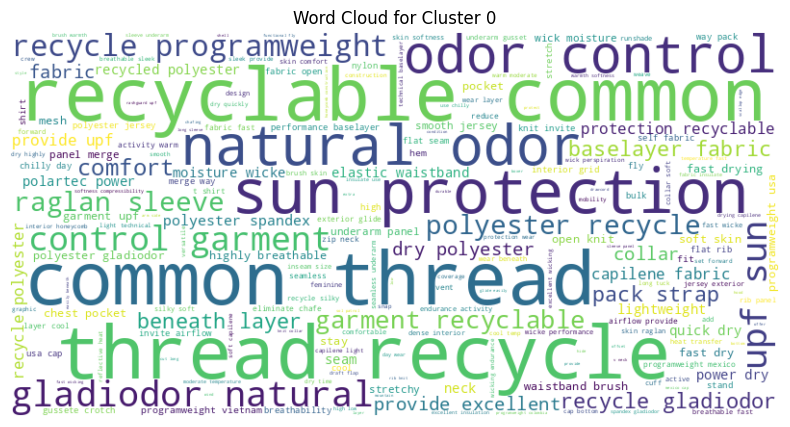

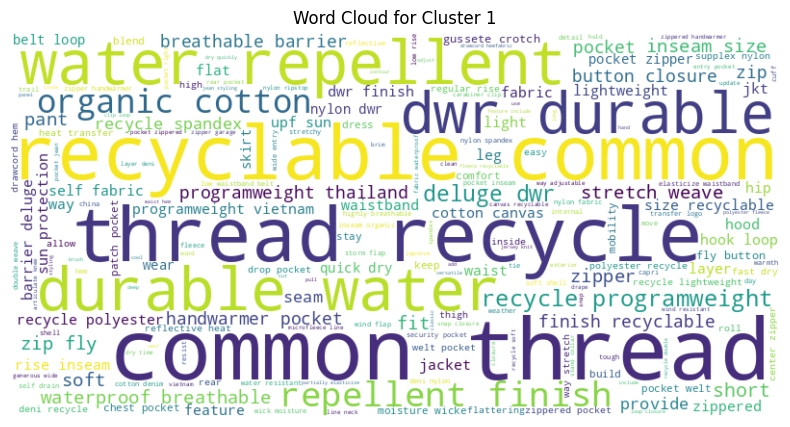

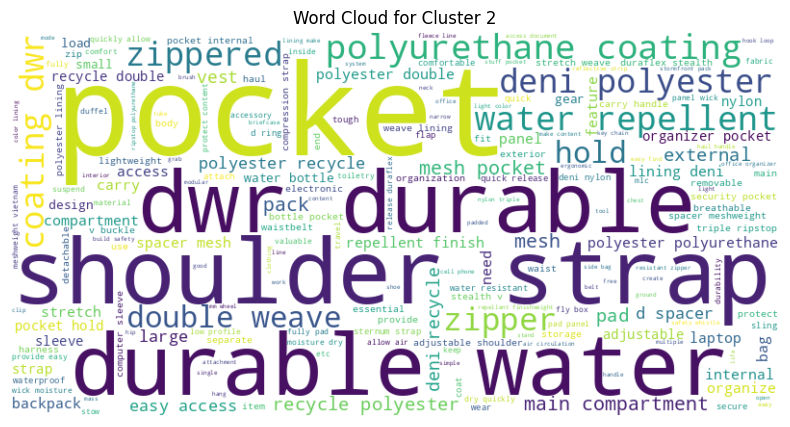

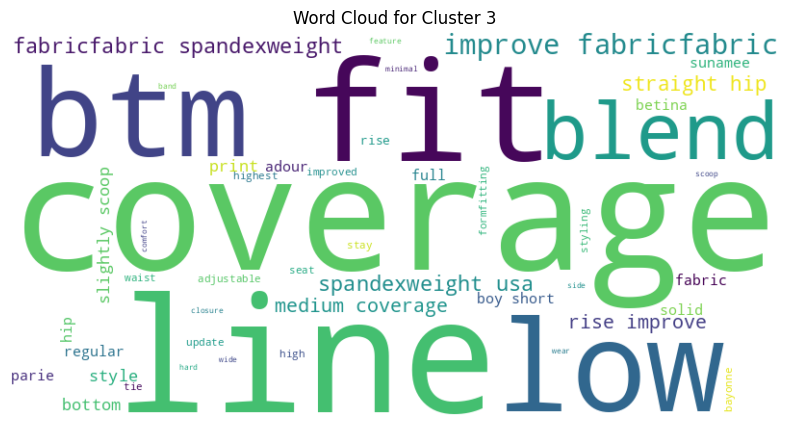

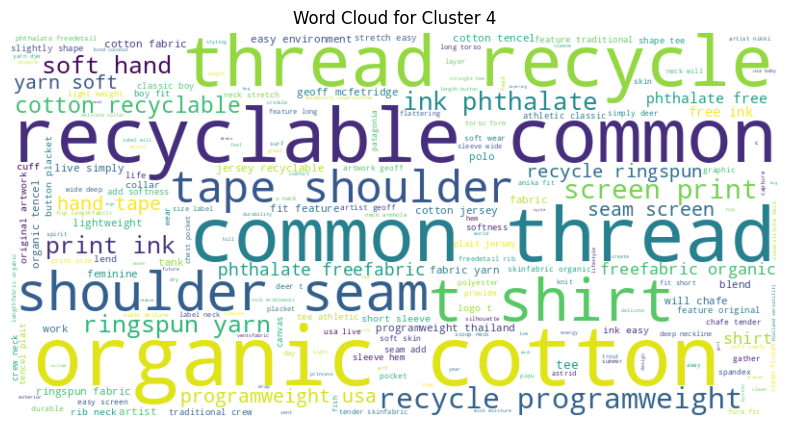

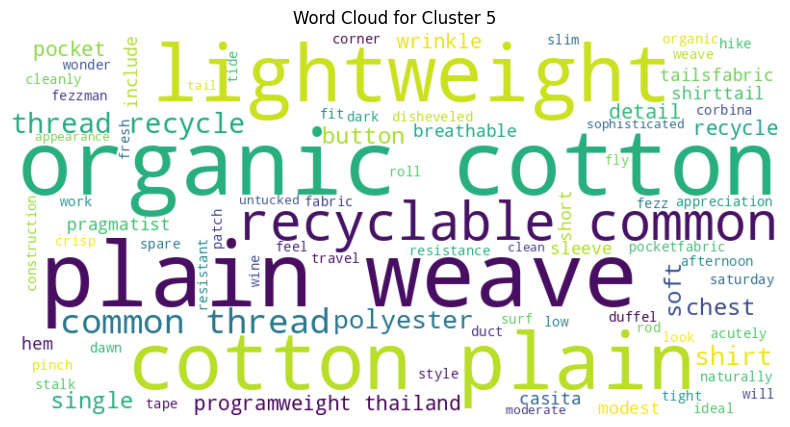

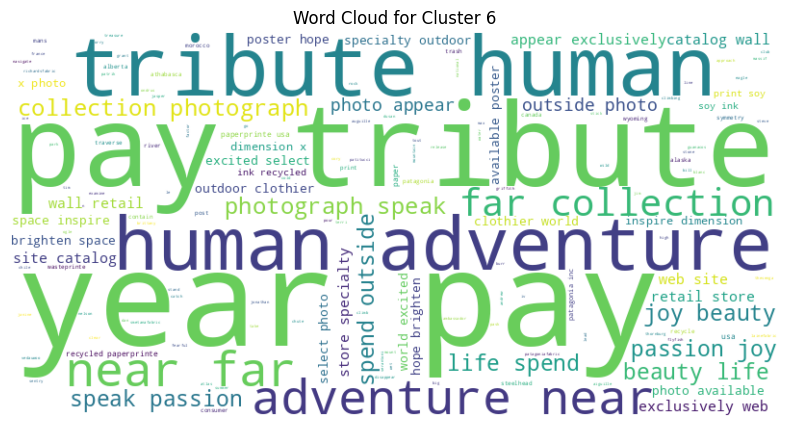

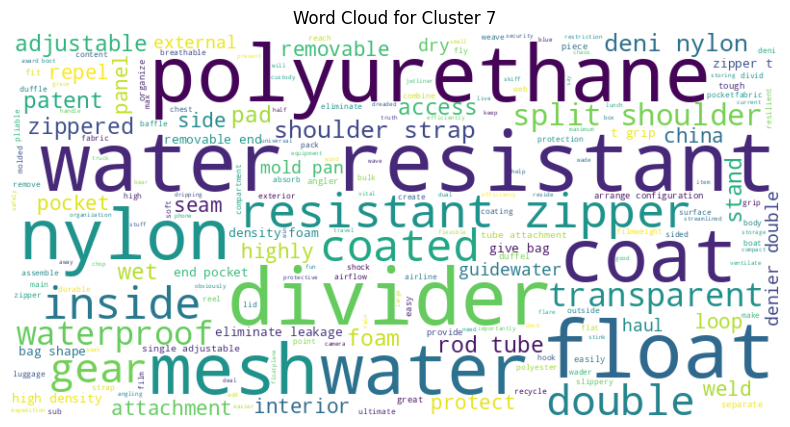

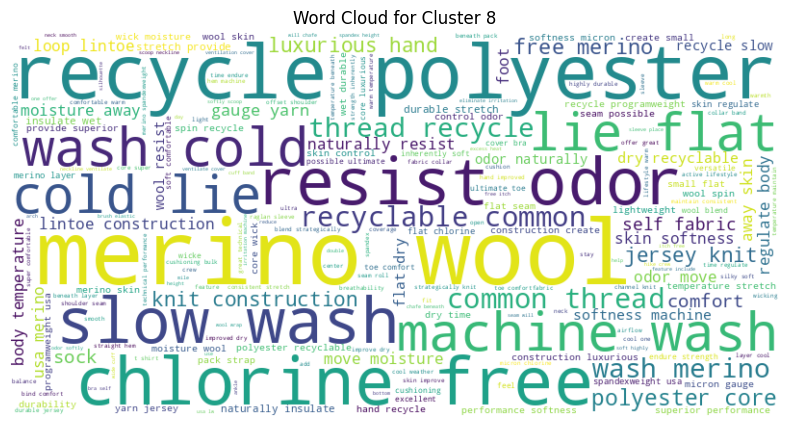

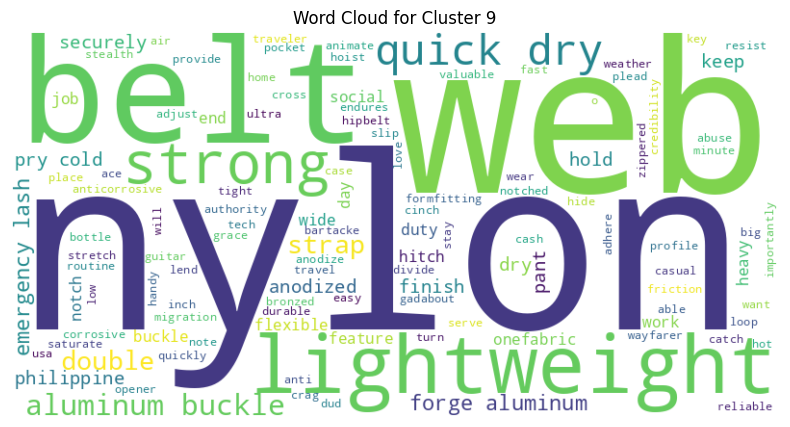

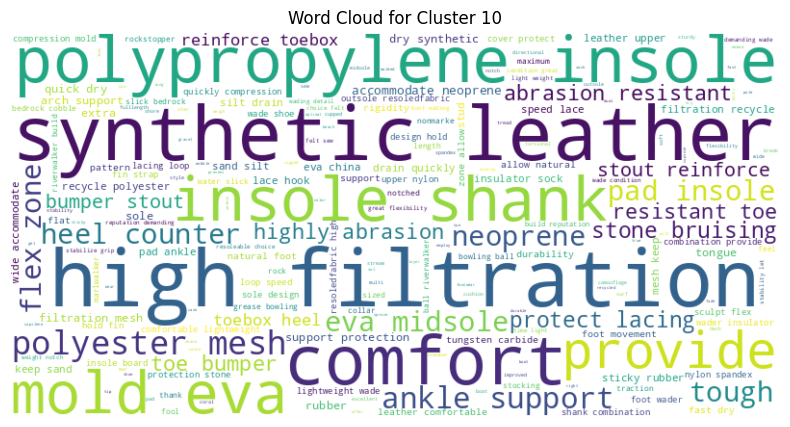

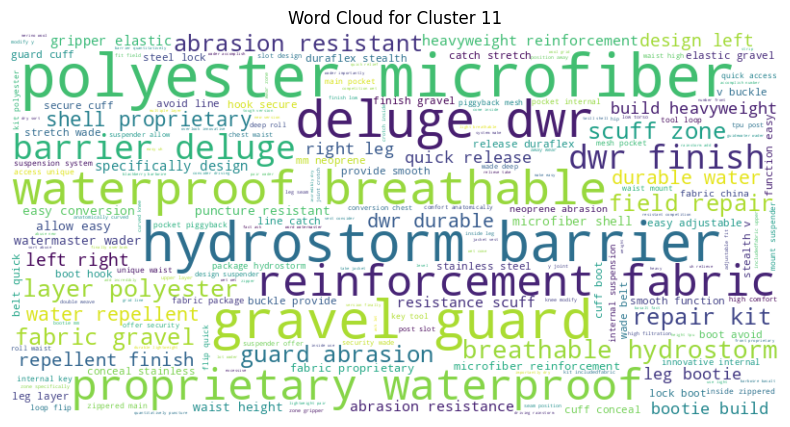

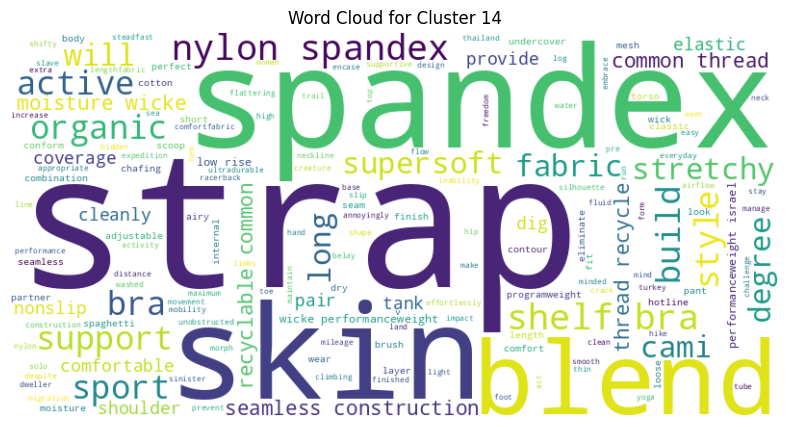

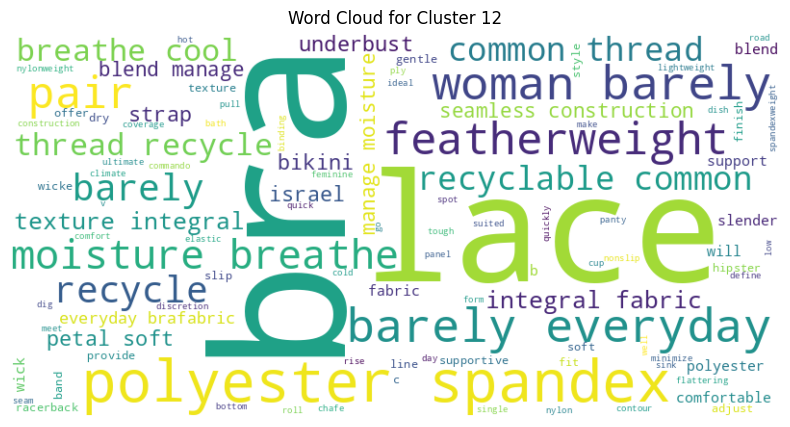

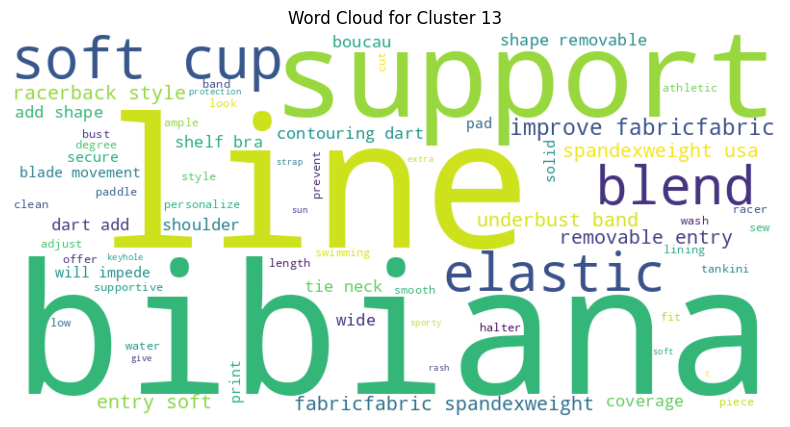

In [74]:
from collections import defaultdict
eps_value = 0.716
min_samples = 3


dbscan = DBSCAN(eps=eps_value, min_samples=min_samples, metric="cosine")
labels = dbscan.fit_predict(tfidf_matrix)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_outliers = list(labels).count(-1)
print(n_clusters, n_outliers)


cluster_texts = defaultdict(str)
for label, text in zip(labels, data['pro_description']):
    if label != -1:  
        cluster_texts[label] += " " + text


for cluster_id, text in cluster_texts.items():
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Cluster {cluster_id}")
    plt.show()

In [ ]:
data['cluster'] = dbscan.labels_

In [76]:
data.to_csv('processed_data.csv', index=False)

## Topic Modeling

In [ ]:
n_components = 
svd_model = TruncatedSVD(n_components=n_components, random_state=42)

topic_encoded_matrix = svd_model.fit_transform(tfidf_matrix)

topic_encoded_df = pd.DataFrame(topic_encoded_matrix, columns=[f"topic_{i}" for i in range(n_components)])

print("Explained variance by each topic:", svd_model.explained_variance_ratio_)
print("Total explained variance:", svd_model.explained_variance_ratio_.sum())


Explained variance by each topic: [0.00759264 0.04607712 0.0310399  0.02539868 0.02017499 0.01629346
 0.01476478 0.01392757 0.01311283 0.0128388  0.01212096 0.01123429
 0.01075595 0.01022566 0.0098469 ]
Total explained variance: 0.2554045333433765


In [80]:
data['main_topic'] = topic_encoded_df.idxmax(axis=1)

In [81]:
data

id                                        description  \
0      1  Active classic boxers - There's a reason why o...   
1      2  Active sport boxer briefs - Skinning up Glory ...   
2      3  Active sport briefs - These superbreathable no...   
3      4  Alpine guide pants - Skin in, climb ice, switc...   
4      5  Alpine wind jkt - On high ridges, steep ice an...   
..   ...                                                ...   
495  496  Cap 2 bottoms - Cut loose from the maddening c...   
496  497  Cap 2 crew - This crew takes the edge off fick...   
497  498  All-time shell - No need to use that morning T...   
498  499  All-wear cargo shorts - All-Wear Cargo Shorts ...   
499  500  All-wear shorts - Time to simplify? Our All-We...   

                                         no_title_desc  \
0    There's a reason why our boxers are a cult fav...   
1    Skinning up Glory requires enough movement wit...   
2    These superbreathable no-fly briefs are the mi...   
3    Skin in, climb ice, switch to rock, traverse a...   
4    On high ridges, steep ice and anything alpine,...   
..                                                 ...   
495  Cut loose from the maddening crowds and search...   
496  This crew takes the edge off fickle weather. I...   
497  time shell - No need to use that morning Times...   
498  wear cargo shorts - All-Wear Cargo Shorts bask...   
499  wear shorts - Time to simplify? Our All-Wear s...   

                                            clean_desc  \
0    Active classic boxers - There's a reason why o...   
1    Active sport boxer briefs - Skinning up Glory ...   
2    Active sport briefs - These superbreathable no...   
3    Alpine guide pants - Skin in, climb ice, switc...   
4    Alpine wind jkt - On high ridges, steep ice an...   
..                                                 ...   
495  Cap 2 bottoms - Cut loose from the maddening c...   
496  Cap 2 crew - This crew takes the edge off fick...   
497  All-time shell - No need to use that morning T...   
498  All-wear cargo shorts - All-Wear Cargo Shorts ...   
499  All-wear shorts - Time to simplify? Our All-We...   

                                       pro_description  \
0    active classic boxer reason boxer cult favorit...   
1    active sport boxer brief skin glory require mo...   
2    active sport brief superbreathable fly brief m...   
3    alpine guide pant skin climb ice switch rock t...   
4    alpine wind jkt high ridge steep ice alpine ja...   
..                                                 ...   
495  cap bottom cut loose madden crowd search undon...   
496  cap crew crew take edge fickle weather clearin...   
497  time shell need use morning time umbrella time...   
498  wear cargo short wear cargo short bask glory s...   
499  wear short time simplify wear short prove shor...   

                                     pro_no_title_desc  cluster main_topic  
0    reason boxer cult favorite cool especially sti...        0    topic_0  
1    skin glory require movement boxer decide poach...        0    topic_0  
2    superbreathable fly brief minimalist choice hi...        0    topic_0  
3    skin climb ice switch rock traverse knife edge...        1    topic_0  
4    high ridge steep ice alpine jacket serve true ...        1    topic_0  
..                                                 ...      ...        ...  
495  cut loose madden crowd search undone capilene ...        0    topic_2  
496  crew take edge fickle weather clearing conditi...        0    topic_2  
497  time shell need use morning time umbrella time...        1    topic_0  
498  wear cargo short wear cargo short bask glory s...        1    topic_3  
499  wear short time simplify wear short prove shor...        1    topic_0  

[500 rows x 8 columns]

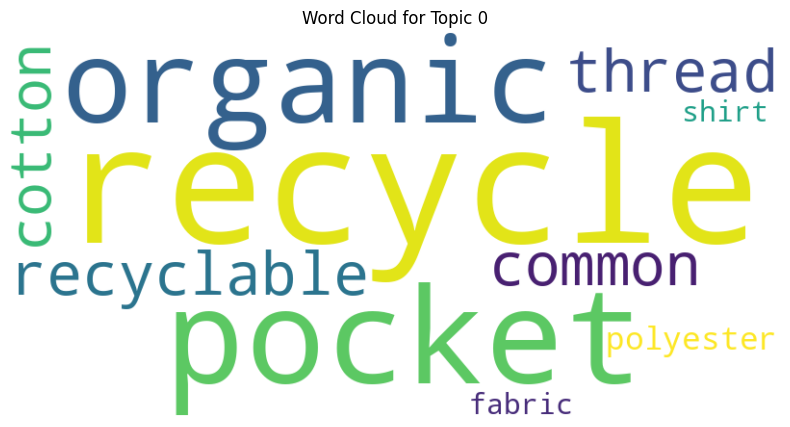

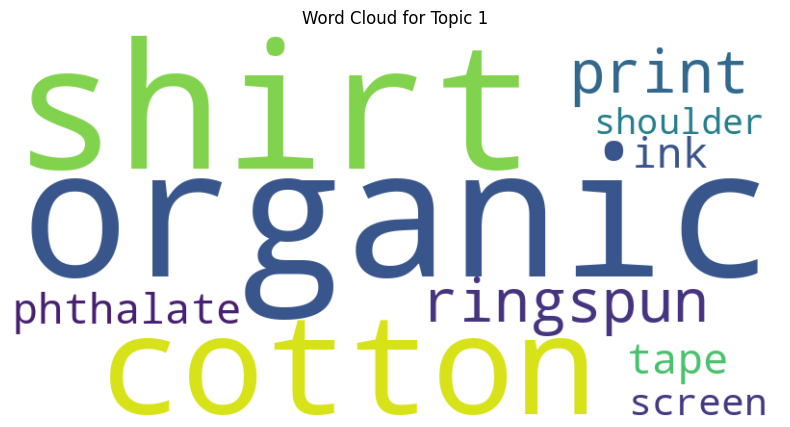

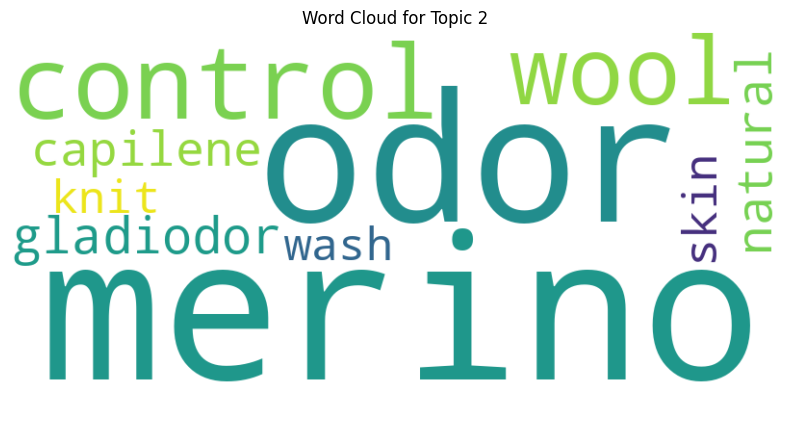

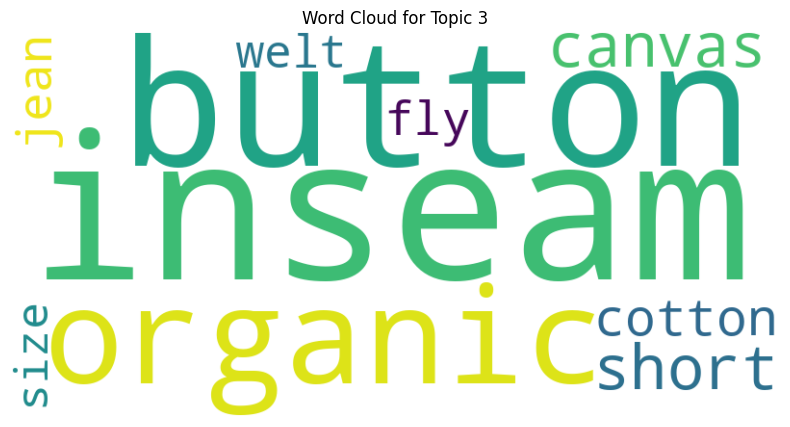

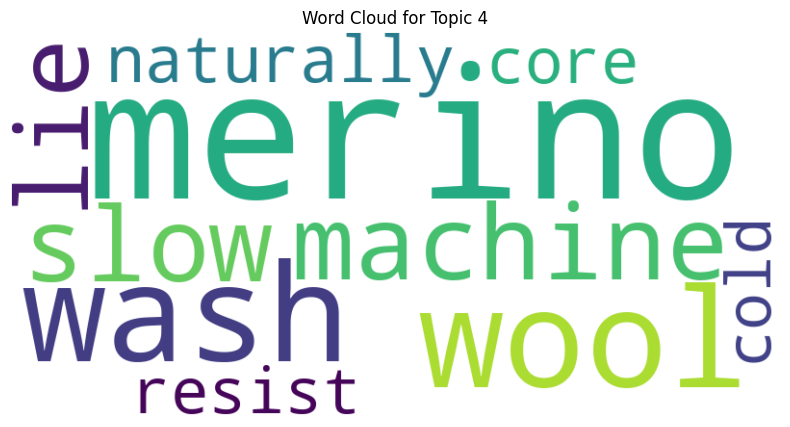

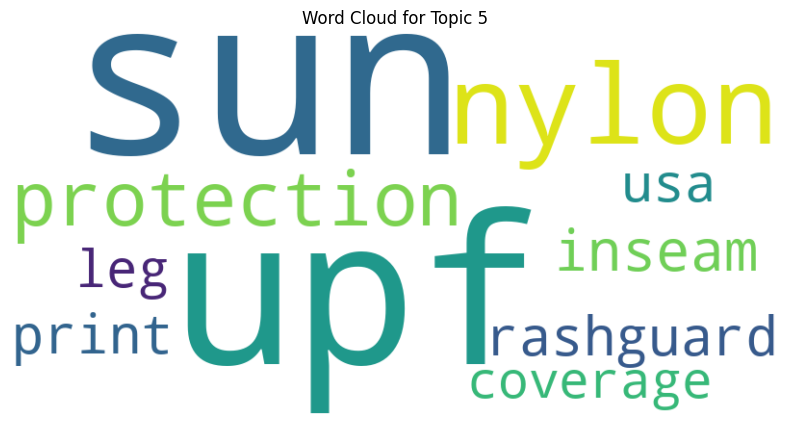

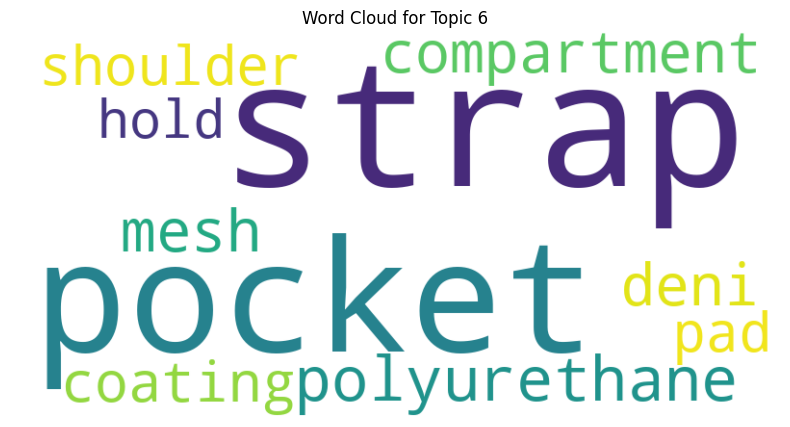

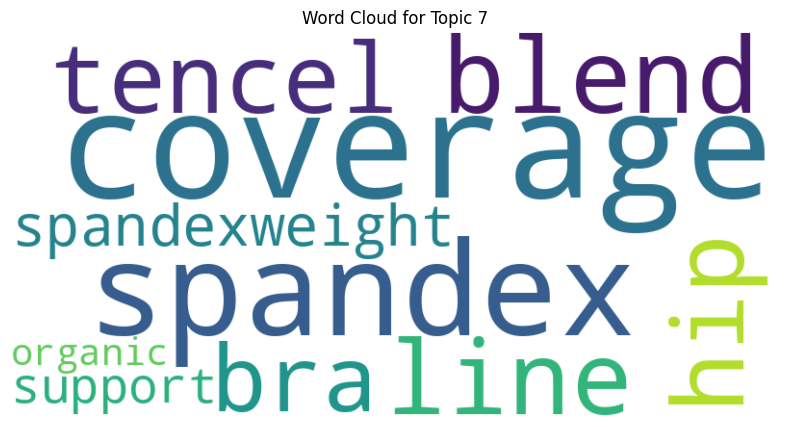

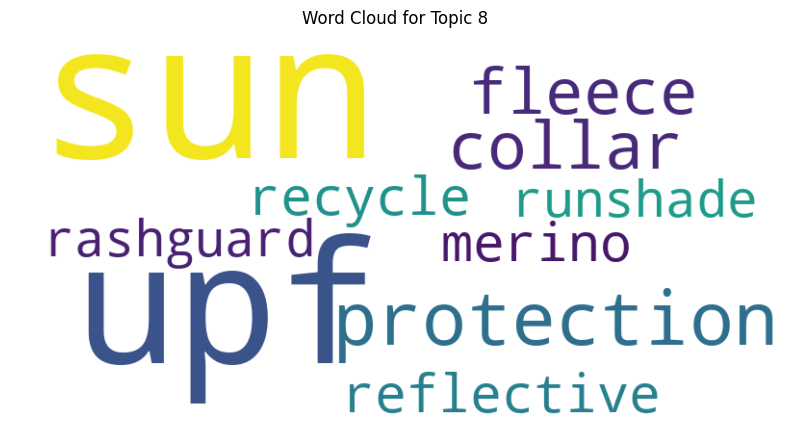

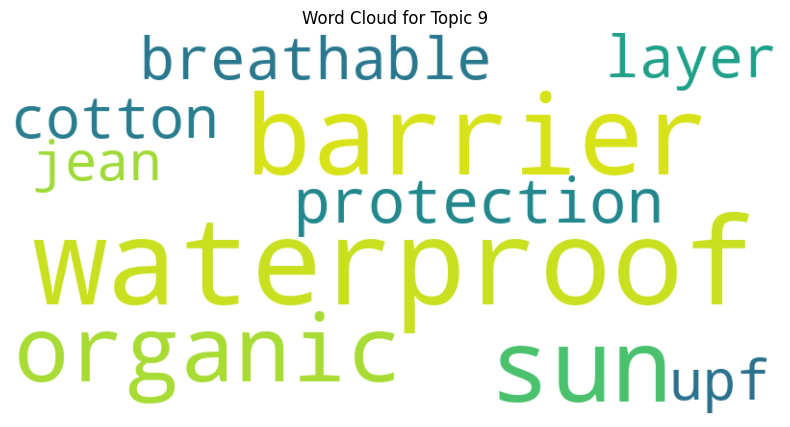

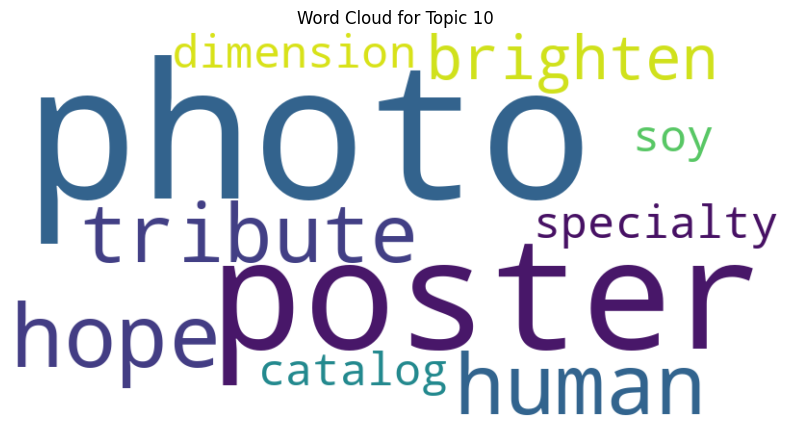

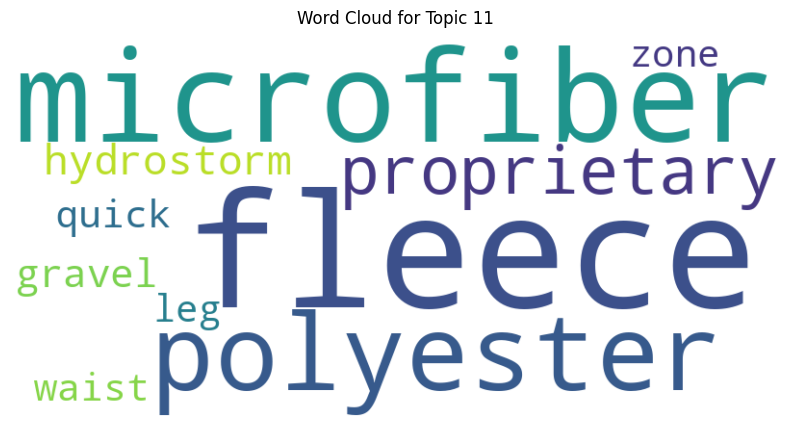

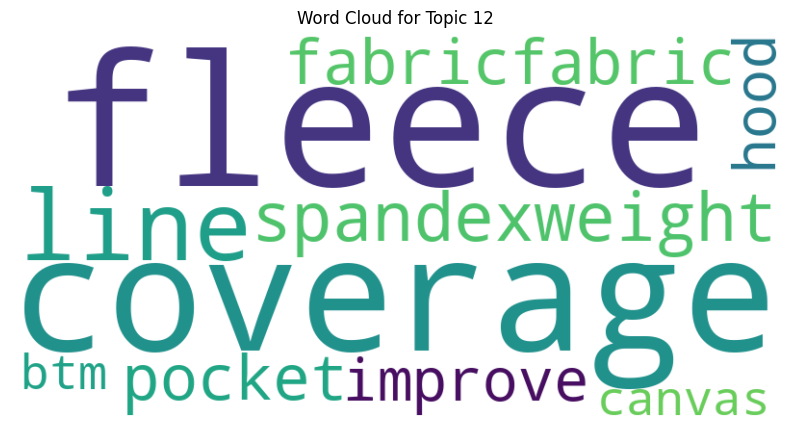

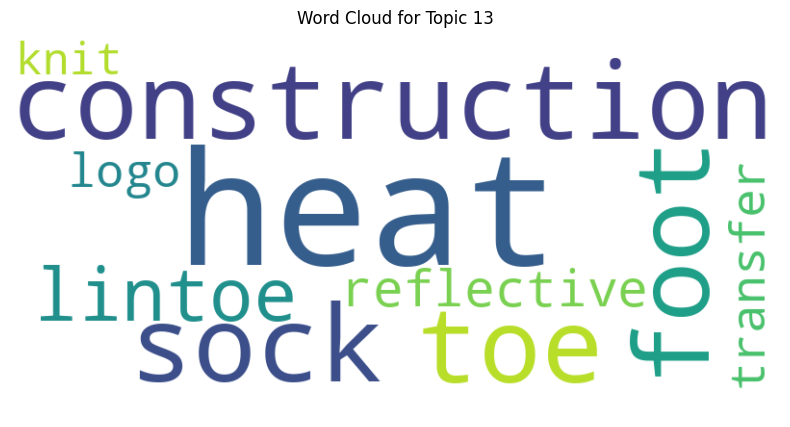

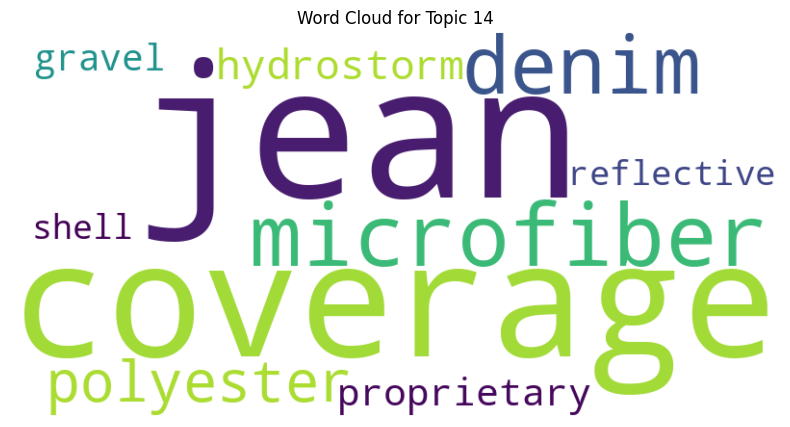

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
n_top_words = 10

def plot_wordcloud_for_topic(topic_idx):
    
    component = svd_model.components_[topic_idx]
    
    top_word_indices = component.argsort()[-n_top_words:][::-1]  
    top_words = {feature_names[i]: component[i] for i in top_word_indices}  
    
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {topic_idx}")
    plt.show()

for topic_idx in range(svd_model.n_components):
    plot_wordcloud_for_topic(topic_idx)